In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [21]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [22]:
import numpy as np

Аппроксимация прямой

In [23]:
def fit_line(points):
    new_points = []
    for i in points:
      new_points.append([i[0], np.log(i[1])])
  #points = np.log(points)
    #points[points == -np.inf] = 0
    r = np.polyfit([p[0] for p in points], [p[1] for p in points], 1)
    print(f"y = {r[0]:.2f}x + {r[1]:.2f}")
    return r[0], r[1]



In [24]:
x = np.linspace(-100.,100.)

In [25]:
def findR0(a):
  G = 6.5
  k = 16.25
  ro = G * a
  if a < 0:
    return 0
  return (1 + k*ro) ** (1/k)


#Italy

In [26]:
ch_cases = pd.DataFrame()
ch_cases['Date'] = df['date']
ch_cases['Cases'] = df['new_cases']
ch_cases['Location'] = df['location']
ch_cases = ch_cases.loc[(ch_cases['Location'] == 'Italy')]
ch_cases = ch_cases.loc[(ch_cases['Date'] < '2020-03-15')]
ch_cases = ch_cases.loc[(ch_cases['Date'] > '2020-02-20')]
ch_cases = ch_cases.drop(columns='Location')
ch_cases = ch_cases.dropna()
ch_cases['Cases'] = ch_cases['Cases'].astype(int)
ch_cases = ch_cases.set_index('Date')['Cases']
ch_cases

Date
2020-02-21      17
2020-02-22      42
2020-02-23      93
2020-02-24      74
2020-02-25      93
2020-02-26     131
2020-02-27     202
2020-02-28     233
2020-02-29     240
2020-03-01     566
2020-03-02     342
2020-03-03     466
2020-03-04     587
2020-03-05     769
2020-03-06     778
2020-03-07    1247
2020-03-08    1492
2020-03-09    1797
2020-03-10     977
2020-03-11    2313
2020-03-12    2651
2020-03-13    2547
2020-03-14    3497
Name: Cases, dtype: int64

In [27]:
len(ch_cases)

23

In [28]:
res = ch_cases.to_numpy()
vals = []
for i in range(len(res)):
  vals.append([i, res[i]])
vals =np.array(vals)

In [29]:
variant1 = vals[:10]
a, b = fit_line(variant1)

y = 45.15x + -34.05


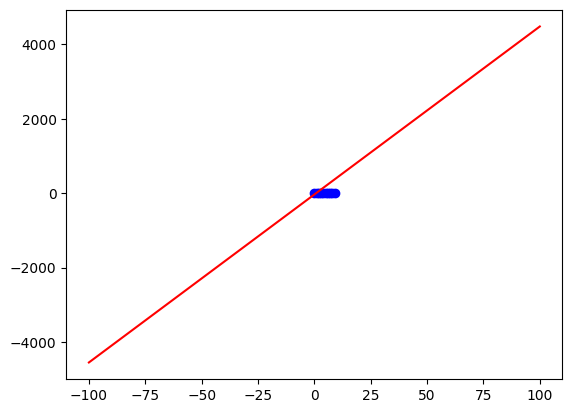

In [30]:

plt.scatter(variant1[:,0], np.log(variant1[:,1]),  c ="blue")
plt.plot(x,a*x+b,  c ="red")
plt.show()

In [31]:
findR0(a)

1.6840985290010666

In [32]:
variant2 = vals[:20]
a, b = fit_line(variant2)

y = 96.41x + -292.93


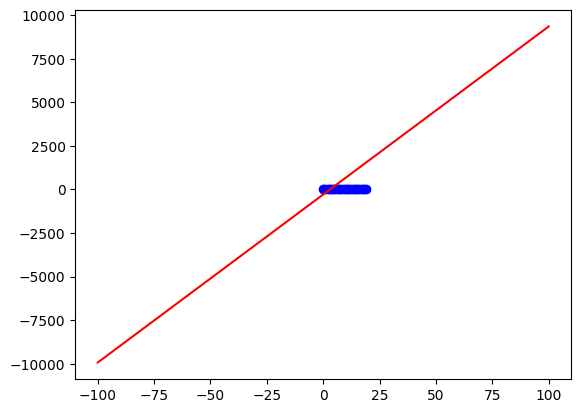

In [33]:
plt.scatter(variant2[:,0], np.log(variant2[:,1]),  c ="blue")
plt.plot(x,a*x+b,  c ="red")
plt.show()

In [34]:
findR0(a)

1.7645804205461086

y = 131.64x + -528.29


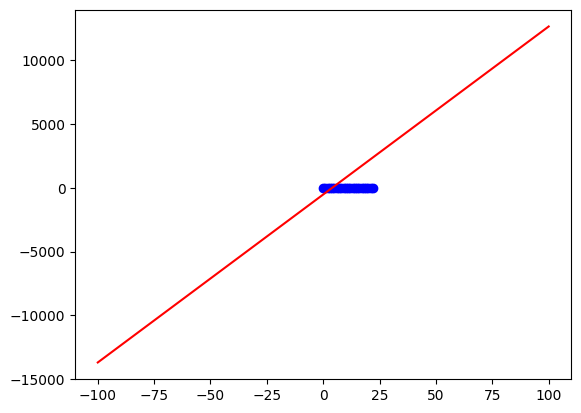

In [35]:
variant3 = vals
a, b = fit_line(variant3)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant3[:,0], np.log(variant3[:,1]),  c ="blue")
plt.show()

In [36]:
findR0(a)

1.798726551110518

#Germany

In [37]:
ch_cases = pd.DataFrame()
ch_cases['Date'] = df['date']
ch_cases['Cases'] = df['new_cases']
ch_cases['Location'] = df['location']
ch_cases = ch_cases.loc[(ch_cases['Location'] == 'Germany')]
ch_cases = ch_cases.loc[(ch_cases['Date'] < '2020-03-15')]
ch_cases = ch_cases.loc[(ch_cases['Date'] > '2020-02-27')]
ch_cases = ch_cases.drop(columns='Location')
ch_cases = ch_cases.dropna()
ch_cases['Cases'] = ch_cases['Cases'].astype(int)
ch_cases = ch_cases.set_index('Date')['Cases']
ch_cases

Date
2020-02-28     27
2020-02-29     13
2020-03-01     51
2020-03-02     33
2020-03-03     38
2020-03-04     52
2020-03-05    109
2020-03-06    185
2020-03-07    150
2020-03-08    163
2020-03-09    265
2020-03-10    184
2020-03-11    271
2020-03-12    802
2020-03-13    693
2020-03-14    733
Name: Cases, dtype: int64

In [38]:
len(ch_cases)

16

In [39]:
res = ch_cases.to_numpy()
vals = []
for i in range(len(res)):
  vals.append([i, res[i]])
vals =np.array(vals)

y = 18.76x + -2.31


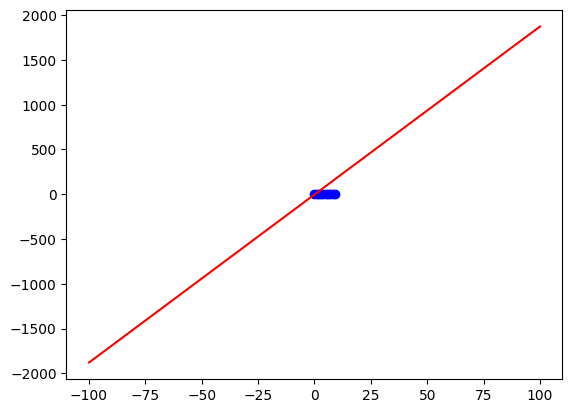

In [40]:
variant1 = vals[:10]
a, b = fit_line(variant1)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant1[:,0], np.log(variant1[:,1]),  c ="blue")
plt.show()

In [41]:
findR0(a)

1.5955202199867475

y = 47.13x + -117.90


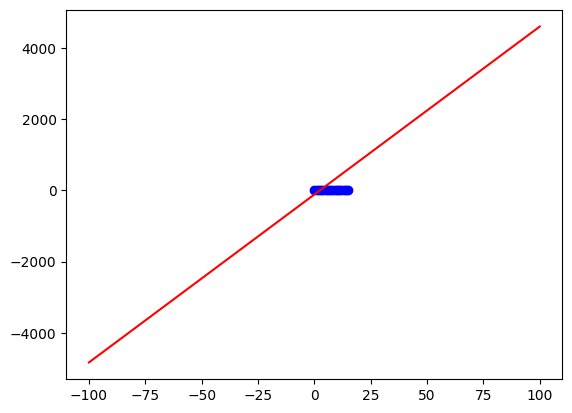

In [42]:
variant2 = vals[:20]
a, b = fit_line(variant2)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant2[:,0], np.log(variant2[:,1]),  c ="blue")
plt.show()

In [43]:
findR0(a)

1.6885574511482826

y = 47.13x + -117.90


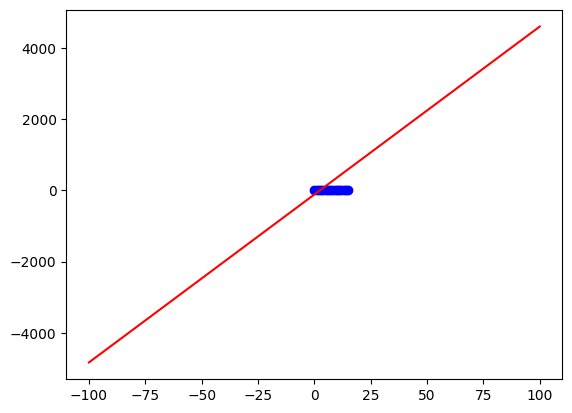

In [44]:
variant3 = vals
a, b = fit_line(variant3)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant3[:,0], np.log(variant3[:,1]),  c ="blue")
plt.show()

In [45]:
findR0(a)

1.6885574511482826

#China

In [46]:
df = pd.read_csv('nc_wuhan.csv', parse_dates=['dates'])

In [47]:
ch_cases = pd.DataFrame()
ch_cases['Date'] = df['dates']
ch_cases['Cases'] = df['new_cases']
ch_cases = ch_cases.loc[(ch_cases['Date'] < '2020-02-12')]
ch_cases = ch_cases.dropna()
ch_cases['Cases'] = ch_cases['Cases'].astype(int)
ch_cases = ch_cases.set_index('Date')['Cases']
ch_cases

Date
2020-01-25      77
2020-01-26      46
2020-01-27      80
2020-01-28     892
2020-01-29     315
2020-01-30     356
2020-01-31     378
2020-02-01     576
2020-02-02     894
2020-02-03    1033
2020-02-04    1242
2020-02-05    1967
2020-02-06    1766
2020-02-07    1501
2020-02-08    1985
2020-02-09    1379
2020-02-10    1920
2020-02-11    1552
Name: Cases, dtype: int64

In [48]:
len(ch_cases)

18

In [49]:
res = ch_cases.to_numpy()
vals = []
for i in range(len(res)):
  vals.append([i, res[i]])
vals =np.array(vals)

y = 132.20x + 17.60


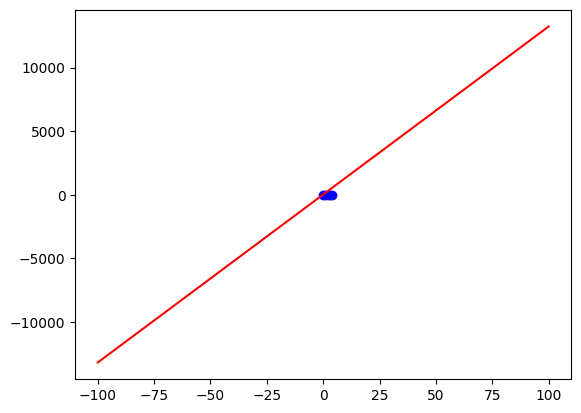

In [50]:
variant1 = vals[:5]
a, b = fit_line(variant1)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant1[:,0], np.log(variant1[:,1]),  c ="blue")
plt.show()

In [51]:
findR0(a)

1.7991970269655233

y = 94.05x + 41.45


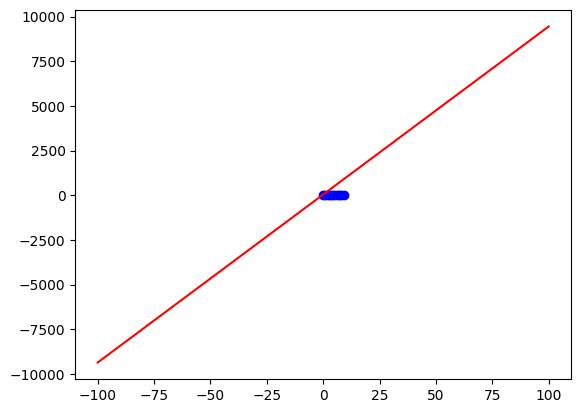

In [52]:
variant2 = vals[:10]
a, b = fit_line(variant2)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant2[:,0], np.log(variant2[:,1]),  c ="blue")
plt.show()

In [53]:
findR0(a)

1.761898707156336

y = 140.95x + -112.81


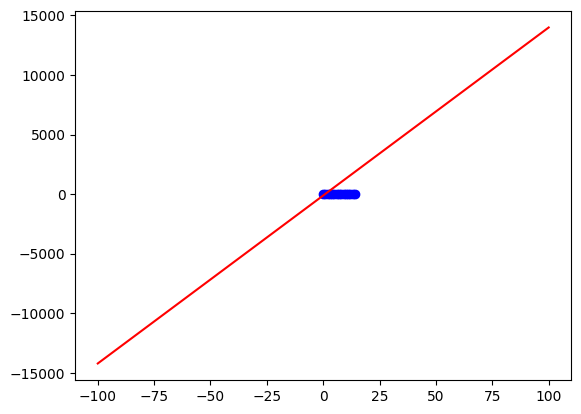

In [54]:
variant3 = vals[:15]
a, b = fit_line(variant3)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant3[:,0], np.log(variant3[:,1]),  c ="blue")
plt.show()

In [55]:
findR0(a)

1.8063093150939755

y = 116.33x + 8.94


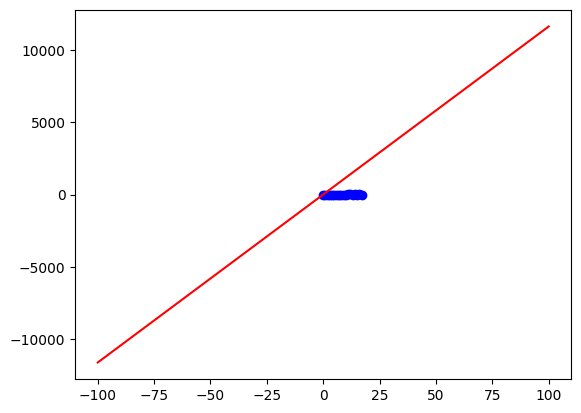

In [56]:
variant4 = vals
a, b = fit_line(variant4)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant4[:,0], np.log(variant4[:,1]),  c ="blue")
plt.show()

In [57]:
findR0(a)

1.7850915731241699